# Data Visualization for "Dog bite incidents in Toronto from 2022 to 2024"
## This visualization is based on the dataset "Dogs Issued Dangerous Dog Orders" obtained from the City of Toronto's Open Data Portal.
https://open.toronto.ca/dataset/dogs-issued-dangerous-dog-orders/


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df = pd.read_csv(r'data\DogsIssuedDangerousDogOrders.csv')

In [50]:
df[ (df.Date_of_Dangerous_Act >= '02-01-2022') & (df.Date_of_Dangerous_Act < '03-01-2022')]

,_id,Forward_Sortation_Area,Name_of_Dog,Breed,Color,Ward_Number,Ward_Name,Bite_Circumstance,Location_of_Incident,Date_of_Dangerous_Act
149,150,M9R,VENOM,BELG MALINOIS,BROWN / BLACK,2.0,Etobicoke Centre,SEVERE,OTHER PRIVATE PROPERTY,2022-02-02
150,151,M9M,BONES,BORDER COLLIE / LABRADOR RETR,BLACK / WHITE,7.0,Humber River-Black Creek,NON SEVERE,PUBLIC PROPERTY,2022-02-10
151,152,M4C,HUNDO,GERM SHEPHERD / LABRADOR RETR,BLACK / BROWN,19.0,Beaches-East York,NOT A BITE,OTHER PRIVATE PROPERTY,2022-02-20


C:\Users\gwmch\AppData\Local\Temp\ipykernel_24948\3485283096.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, size=10)


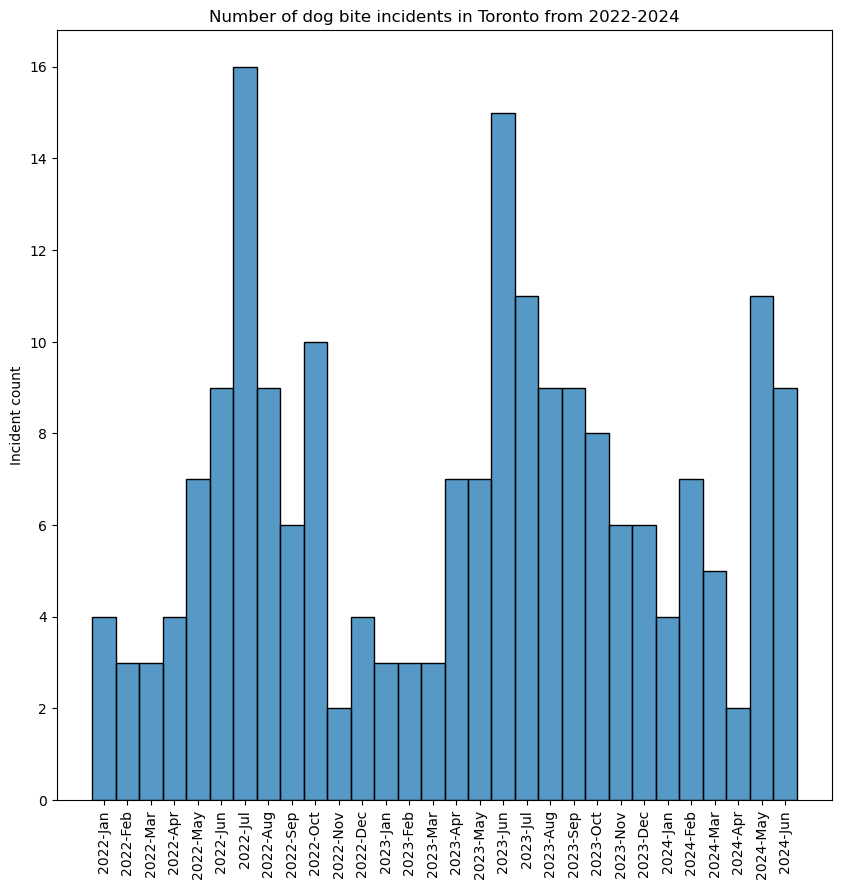

In [52]:
# cast type of date column and only use this column for our graph 
dates = pd.DataFrame(df["Date_of_Dangerous_Act"].astype("datetime64[ns]"))
# filter out the most recent 2 years of data
dates = dates[ (dates.Date_of_Dangerous_Act >= '2022-01-01') & 
               (dates.Date_of_Dangerous_Act < '2024-07-01') ]

# convert exact date to month-year format for aggregation
dates['ymon_date'] = dates.map(lambda x: x.strftime('%Y-%b'))
plt.figure(figsize = (10, 10))
ax = sns.histplot(data = dates, x = 'ymon_date')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, size=10)    # make sure to rotate x-axis ticklabels
ax.set_title('Number of dog bite incidents in Toronto from 2022-2024')
ax.set_xlabel('')
ax.set_ylabel('Incident count')
plt.show()
